In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
     

In [3]:
url = 'https://raw.githubusercontent.com/alyshapm/coral-reef-bleaching/main/NOAA_ReefCheck/NOAA_int.csv'
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\coral-reef-bleaching-main\coral-reef-bleaching-main\NOAA_ReefCheck\NOAA_int.csv")
df.head()

,Bleaching,Ocean,Year,Depth,Storms,HumanImpact,Siltation,Dynamite,Poison,Sewage,Industrial,Commercial
0,0,Atlantic,2005,4.0,1,3,2,0,0,3,0,0
1,0,Red Sea,2004,6.0,0,3,1,0,0,1,0,0
2,0,Pacific,1998,3.0,0,1,0,0,0,0,1,0
3,0,Pacific,1998,10.0,0,1,0,0,0,0,1,0
4,0,Atlantic,1997,10.0,0,3,0,0,0,3,2,0


In [5]:
target = df["Bleaching"]
features = df.drop(["Bleaching","Ocean","Year", "Depth"], axis=1)

# Splitting the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 10)

In [7]:
linear_model = SVC(kernel='linear')
linear_model.fit(X_train, y_train)
 
linear_prediction = linear_model.predict(X_test)

# Checking the accuracy for train and test data
print("Train score: ", linear_model.score(X_train, y_train))
print("Test score: ", linear_model.score(X_test, y_test))

# Checking the confusion matrix
print("Confusion Matrix:\n",confusion_matrix(linear_prediction, y_test))

print(classification_report(linear_prediction, y_test, zero_division=0))

Train score:  0.9727144425278345
Test score:  0.9703730797366495
Confusion Matrix:
 [[2653   81]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2734
           1       0.00      0.00      0.00         0

    accuracy                           0.97      2734
   macro avg       0.50      0.49      0.49      2734
weighted avg       1.00      0.97      0.98      2734



Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/10 started...
Batch 40/40: Progress: 100.00%, Time: 1.88s
Epoch 1/10 completed in 339.46s: Train Loss: 0.6806, Train Acc: 57.89%, Val Loss: 0.6643, Val Acc: 68.47%

Epoch 2/10 started...
Batch 40/40: Progress: 100.00%, Time: 1.57s
Epoch 2/10 completed in 285.41s: Train Loss: 0.6103, Train Acc: 72.09%, Val Loss: 0.5244, Val Acc: 75.68%

Epoch 3/10 started...
Batch 40/40: Progress: 100.00%, Time: 1.56s
Epoch 3/10 completed in 285.97s: Train Loss: 0.5243, Train Acc: 77.51%, Val Loss: 0.5073, Val Acc: 72.97%

Epoch 4/10 started...
Batch 40/40: Progress: 100.00%, Time: 1.60s
Epoch 4/10 completed in 292.89s: Train Loss: 0.4269, Train Acc: 80.06%, Val Loss: 0.3859, Val Acc: 81.08%

Epoch 5/10 started...
Batch 40/40: Progress: 100.00%, Time: 1.64s
Epoch 5/10 completed in 295.05s: Train Loss: 0.3455, Train Acc: 82.78%, Val Loss: 0.3592, Val Acc: 86.49%

Epoch 6/10 started...
Batch 40/40: Progress: 100.00%, Time: 1.56s
Epoch 6/10 completed in 274.04s: Train Loss: 0.2892, Train Acc: 89.3

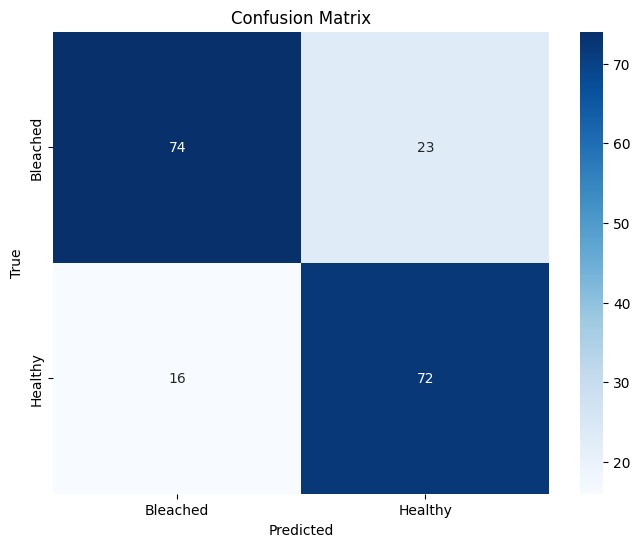

In [7]:
import time
# Import Libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from transformers import ViTForImageClassification, ViTFeatureExtractor
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Device Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define Dataset Paths
train_path = r'C:\Users\Lenovo\Desktop\Coral\Training'
test_path = r'C:\Users\Lenovo\Desktop\Coral\Testing'

# Data Augmentation and Normalization
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load Dataset
train_data = datasets.ImageFolder(train_path, transform=train_transform)
test_data = datasets.ImageFolder(test_path, transform=val_transform)

# Split Training and Validation Data
train_size = int(0.85 * len(train_data))
val_size = len(train_data) - train_size
train_data, val_data = random_split(train_data, [train_size, val_size])

# Data Loaders
batch_size = 16
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=4)

# Load Pretrained ViT Model
model_name = "google/vit-base-patch16-224-in21k"
model = ViTForImageClassification.from_pretrained(model_name, num_labels=2).to(device)

# Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=5e-5, weight_decay=1e-4)

# Scheduler with Warm-Up
scheduler = optim.lr_scheduler.OneCycleLR(
    optimizer,
    max_lr=5e-5,
    steps_per_epoch=len(train_loader),
    epochs=10,
    anneal_strategy='cos'
)


# Training Function with Detailed Logs
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=10):
    best_val_loss = float('inf')
    total_start_time = time.time()  # Track total training time
    
    for epoch in range(epochs):
        epoch_start_time = time.time()  # Track time per epoch
        print(f"\nEpoch {epoch + 1}/{epochs} started...")
        
        # Training Phase
        model.train()
        train_loss, train_correct = 0, 0
        for batch_idx, (images, labels) in enumerate(train_loader):
            batch_start_time = time.time()  # Track time per batch
            
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images).logits
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            scheduler.step()
            
            train_loss += loss.item()
            train_correct += (outputs.argmax(dim=1) == labels).sum().item()
            
            batch_end_time = time.time()
            elapsed_time = batch_end_time - batch_start_time
            progress = 100 * (batch_idx + 1) / len(train_loader)
            print(f"Batch {batch_idx + 1}/{len(train_loader)}: "
                  f"Progress: {progress:.2f}%, Time: {elapsed_time:.2f}s", end="\r")
        
        # Validation Phase
        model.eval()
        val_loss, val_correct = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images).logits
                val_loss += criterion(outputs, labels).item()
                val_correct += (outputs.argmax(dim=1) == labels).sum().item()
        
        train_accuracy = 100 * train_correct / len(train_loader.dataset)
        val_accuracy = 100 * val_correct / len(val_loader.dataset)
        
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        print(f"\nEpoch {epoch + 1}/{epochs} completed in {epoch_time:.2f}s: "
              f"Train Loss: {train_loss / len(train_loader):.4f}, "
              f"Train Acc: {train_accuracy:.2f}%, "
              f"Val Loss: {val_loss / len(val_loader):.4f}, "
              f"Val Acc: {val_accuracy:.2f}%")
        
        # Save Best Model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), "best_vit_model.pth")
    
    total_end_time = time.time()
    total_training_time = total_end_time - total_start_time
    print(f"\nTraining completed in {total_training_time / 60:.2f} minutes.")
    return model

# Testing Function with Logs
def test_model(model, test_loader):
    model.eval()
    test_correct, all_labels, all_preds = 0, [], []
    print("\nTesting started...")
    start_time = time.time()
    
    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(test_loader):
            batch_start_time = time.time()
            
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits
            test_correct += (outputs.argmax(dim=1) == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.argmax(dim=1).cpu().numpy())
            
            batch_end_time = time.time()
            elapsed_time = batch_end_time - batch_start_time
            progress = 100 * (batch_idx + 1) / len(test_loader)
            print(f"Batch {batch_idx + 1}/{len(test_loader)}: "
                  f"Progress: {progress:.2f}%, Time: {elapsed_time:.2f}s", end="\r")
    
    end_time = time.time()
    total_test_time = end_time - start_time
    accuracy = 100 * test_correct / len(test_loader.dataset)
    print(f"\nTesting completed in {total_test_time:.2f}s. Test Accuracy: {accuracy:.2f}%")
    print("\nClassification Report:\n", classification_report(all_labels, all_preds, target_names=test_data.classes))
    
    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=test_data.classes, yticklabels=test_data.classes, cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()
    return accuracy

# Train and Test the Model
model = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=10)
test_accuracy = test_model(model, test_loader)
